In [ ]:
#Get Summary Statistics to better understand the Kamal dataset and present it to others

Loading trajectories for time 5100 


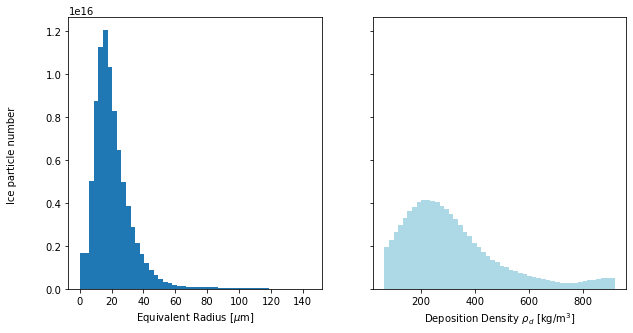

In [1]:
from load_trajectories import get_timestamps, load_trajectories, get_unique_SDs
from sd2bin import Bin_Superdroplets
# Using the NPL 2024a kernel
import os
import os.path

#for calculating the air temperature
from metpy.units import units
from metpy.calc import temperature_from_potential_temperature

#time
from datetime import timedelta

import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

In [3]:
#Load in Trajectory Files
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200'
timestamps = get_timestamps(dirpath)
timestamps

# load every 4 timestamps (every 1 minute)
coarse_timestamps = timestamps[0::4]

# only look at 1000 superdroplets
Ns = 10
unique_superdroplets = get_unique_SDs(dirpath, coarse_timestamps[0])

first_Ns = unique_superdroplets[0:Ns]
print(coarse_timestamps)
print(first_Ns)
trajs = load_trajectories(dirpath, times=coarse_timestamps,
                         num_timesteps = 20,
                         Ns_array = first_Ns)

[5100 5160 5220 5280 5340 5400 5460 5520 5580 5640 5700 5760 5820 5880
 5940 6000 6060 6120 6180 6240 6300 6360 6420 6480 6540 6600 6660 6720
 6780 6840 6900 6960 7020 7080 7140 7200]
[ 409  551  781  872 1422 1464 1934 3033 3531 3883]
Loading trajectories for time 5100 
Loading trajectories for time 5160 
Loading trajectories for time 5220 
Loading trajectories for time 5280 
Loading trajectories for time 5340 
Loading trajectories for time 5400 
Loading trajectories for time 5460 
Loading trajectories for time 5520 
Loading trajectories for time 5580 
Loading trajectories for time 5640 
Loading trajectories for time 5700 
Loading trajectories for time 5760 
Loading trajectories for time 5820 
Loading trajectories for time 5880 
Loading trajectories for time 5940 
Loading trajectories for time 6000 
Loading trajectories for time 6060 
Loading trajectories for time 6120 
Loading trajectories for time 6180 
Loading trajectories for time 6240 


In [15]:
# Write a function that finds the distance travelled of a superdroplet across time
# def distance_travelled(superdroplet):
superdroplet = 409
# x_array = trajs.loc[superdroplet, 'x[m]']
# y_array = trajs.loc[superdroplet, 'y[m]']
# z_array = trajs.loc[superdroplet, 'z[m]']

# disp_x = x_array - x_array.iloc[0]
# disp_y = y_array - y_array.iloc[0] 
# disp_z = z_array - z_array.iloc[0]
# disp_time = ((disp_x)**2 + (disp_y)**2 + (disp_z)**2)**0.5
# disp_time

# trajs['disp'] = x_index_array
trajs = trajs.reset_index(drop=False)
trajs['displacement'] = np.nan

def displacement(group):
    initial_position = group.iloc[0]
    group['displacement']=  np.sqrt((group['x[m]'] - initial_position['x[m]'])**2 +
                            (group['y[m]'] - initial_position['y[m]'])**2 +
                            (group['z[m]'] - initial_position['z[m]'])**2)
    return group
    

#trajs.groupby('rk_deact').apply(displacement)
trajs = trajs.groupby('rk_deact').apply(displacement).reset_index(drop=True)
#trajs['displacement'] = trajs.groupby('rk_deact').apply(displacement)



In [20]:
trajs = trajs[trajs["time"] != 5100]
trajs = trajs[trajs['z[m]'] >= 0]
trajs

,level_0,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time,displacement
0,10,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,1.057165e-05,1.057165e-05,200.59303,108.18,15177056256,ICE,409,0.0,1,5160,0.000000
1,11,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,2.723209e-05,2.723209e-05,200.00253,99.55,74482008064,ICE,551,0.0,1,5160,0.000000
2,12,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,1.894060e-05,1.894060e-05,357.11953,358.64,58047827968,ICE,781,0.0,1,5160,0.000000
3,13,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,4.474743e-05,4.474743e-05,289.06606,289.55,35479605248,ICE,872,0.0,1,5160,0.000000
4,14,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,1.877004e-05,1.877004e-05,362.34346,410.45,28040101888,ICE,1422,0.0,1,5160,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,195,551,177.66596,199.189760,9648.7491,0.0,0.0,1.412397e-14,2.218365e-07,2.218365e-07,916.80000,99.55,74482008064,ICE,551,0.0,1,6240,248.411576
186,196,872,318.91222,394.014130,9359.7129,0.0,0.0,1.622385e-13,7.531640e-06,7.531640e-06,201.30490,289.55,35479605248,ICE,872,0.0,1,6240,175.190628
187,197,1934,335.84141,151.425300,8933.3265,0.0,0.0,2.507824e-13,7.704753e-05,7.704753e-05,202.36388,203.18,24888346624,ICE,1934,0.0,1,6240,279.949087
188,198,3531,238.33078,190.975920,9597.2376,0.0,0.0,5.652341e-14,4.867762e-05,4.867762e-05,200.00104,151.36,63349731328,ICE,3531,0.0,1,6240,194.174175


In [17]:
# time_disp = trajs['time']['displacement'].values
# time_disp

KeyError: 'displacement'

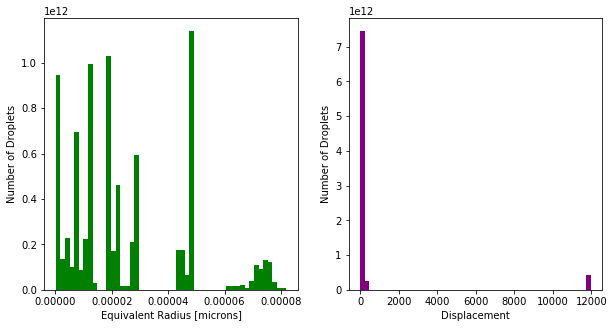

In [18]:
#Plot a histogram using SD2Bin Function
Bin_Superdroplets


#pass next line trajs at a single timestep to see how it changes over time
sd2bin = Bin_Superdroplets(trajs)
sd2bin.calculate_histogram('displacement')
sd2bin.calculate_histogram('radius_eq(ice)[m]')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sd2bin.plot_histogram('radius_eq(ice)[m]', ax[0], color='green', x_label='Equivalent Radius [microns]', y_label='Number of Droplets')
sd2bin.plot_histogram('displacement', ax[1], color='purple', x_label='Displacement', y_label='Number of Droplets')
plt.show()

# fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)
# sd2bin.plot_histogram('displacement', axs[0], x_label='Displacement')
# sd2bin.plot_histogram('radius_eq(ice)[m]', axs[1], scale_factor=1e6, x_label='Radius [microns]')
# #d2bin.plot_histogram('rhod [kg/m3]', axs[1], color='lightblue', x_label='Deposition Density $\\rho_d$ [kg/m$^3$]')
# #fig.text(0.04, 0.5, 'Ice particle number', va='center', rotation='vertical')
# plt.show()

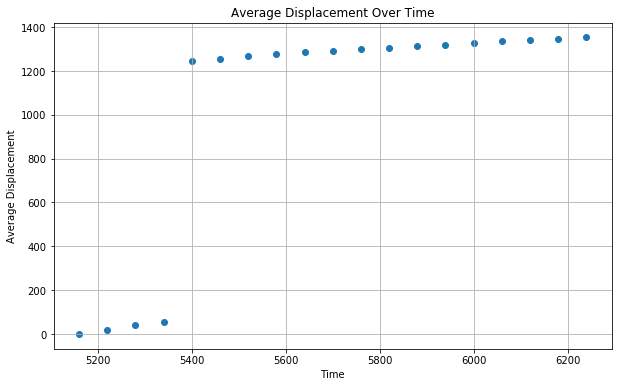

In [19]:
#Plot a timeseries of displacement / time

#Generate an array of the average displacement of particles at each timestep
# displacement_array = []
# trajs = trajs.reset_index(drop=False)
# current_time = -1

# for row in trajs.iterrows():
#     current_time = row['time']
#     if row[
#     displacement_array.append



avg_displacement = trajs.groupby('time')['displacement'].mean()


times_array = trajs['time'].values
times_array = np.unique(times_array)

# # Plotting
plt.figure(figsize=(10, 6))
plt.scatter(times_array, avg_displacement.loc[times_array], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Displacement')
plt.title('Average Displacement Over Time')
plt.grid(True)
plt.show()